In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("BostonHousing.csv")
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax   
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296  \
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [6]:

df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

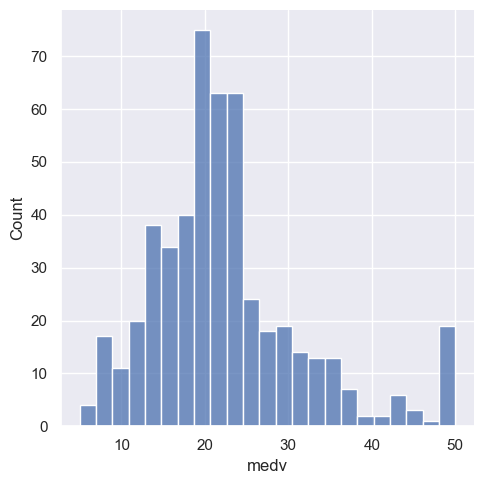

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df["medv"])
plt.show()

<Axes: >

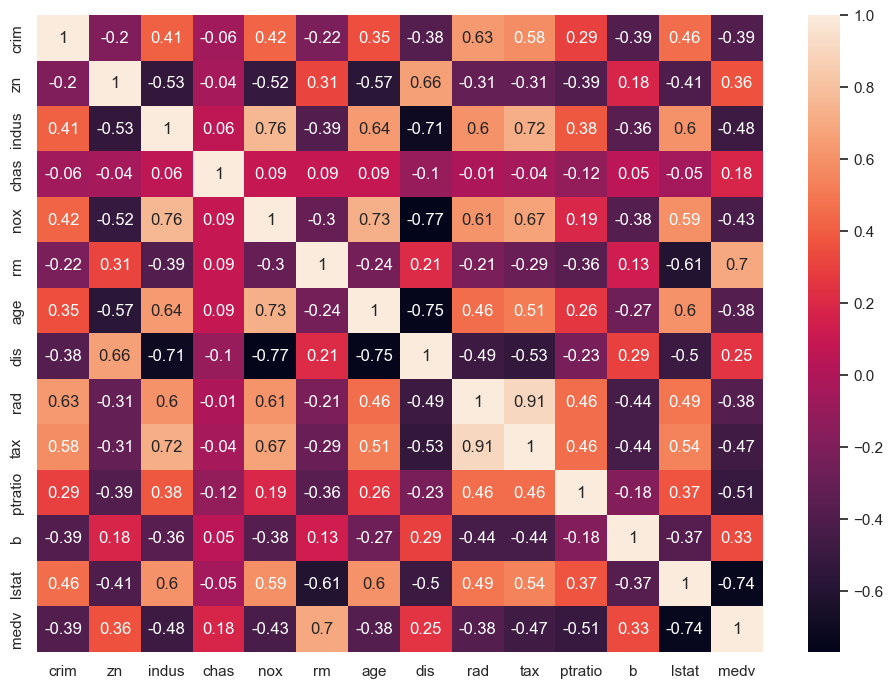

In [8]:
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

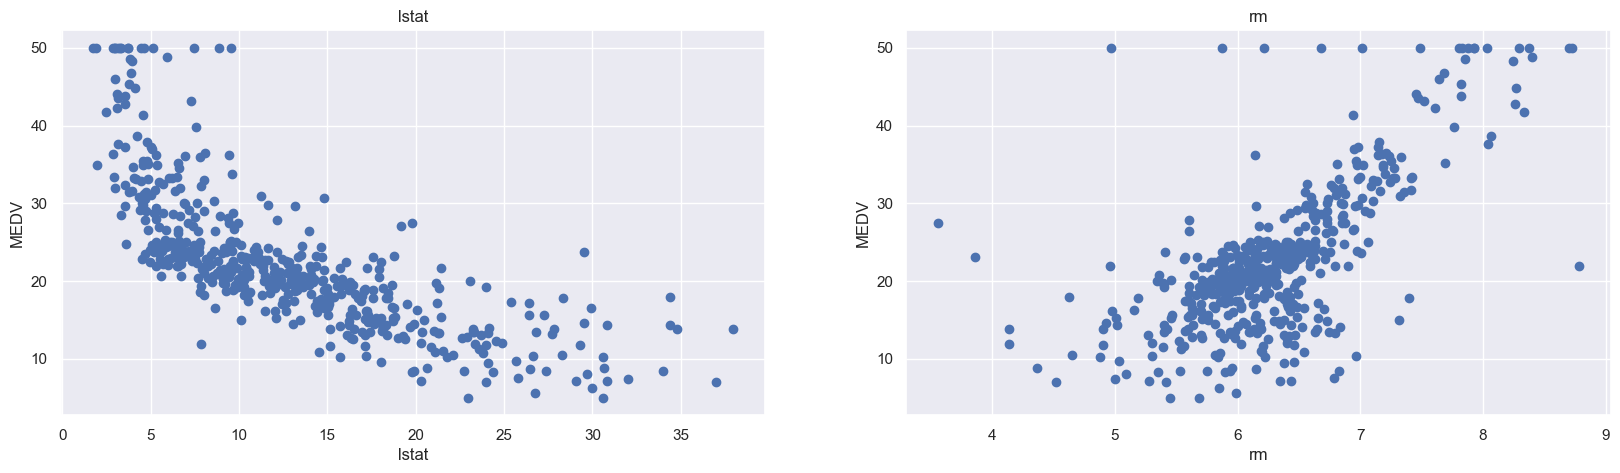

In [14]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = df['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [16]:
X = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['lstat','rm'])
Y = df['medv']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [23]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [24]:
y_pred=lin_model.predict(X_test)

In [27]:
df1 = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':y_pred})
df1

Real Values  Predicted Values
226         37.6         37.389994
292         27.9         29.792906
90          22.6         25.867553
373         13.8          0.313708
273         35.2         33.313856
..           ...               ...
349         26.6         30.357524
212         22.4         17.889629
156         13.1         15.355411
480         23.0         23.680157
248         24.5         25.431750

[102 rows x 2 columns]

In [51]:
from sklearn.metrics import r2_score

Accuracy=r2_score(Y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 66.29


Text(0, 0.5, 'Predicted')

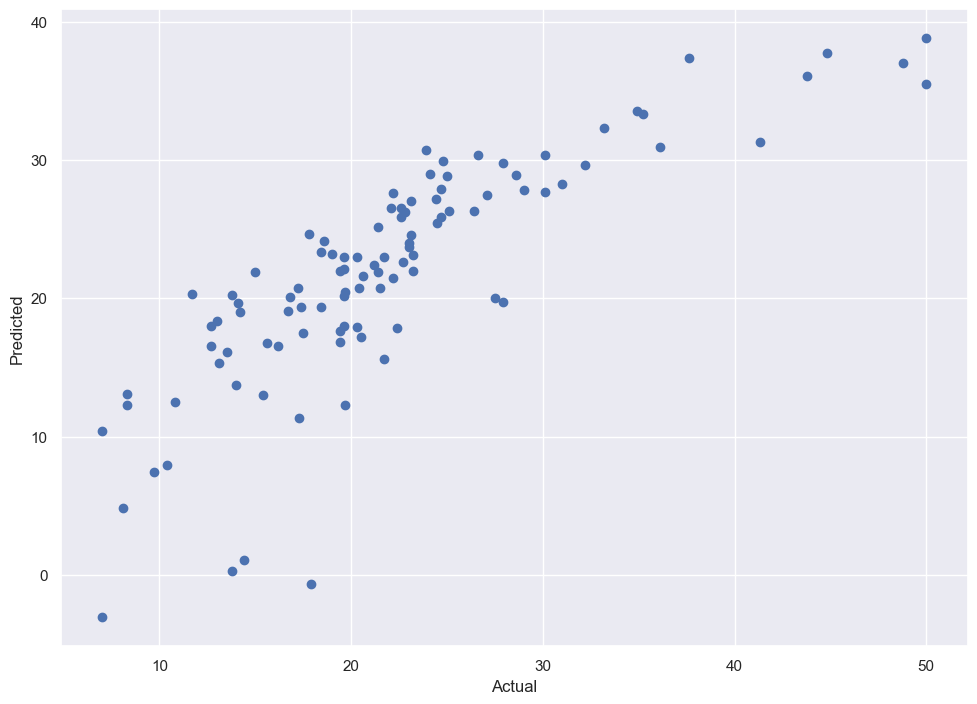

In [52]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='medv'>

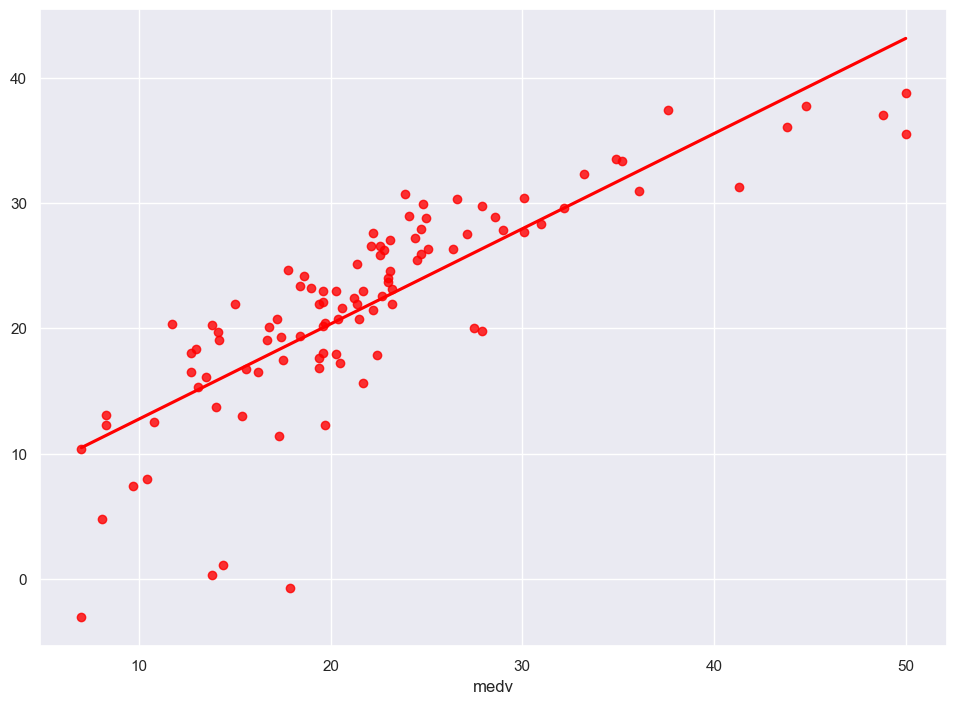

In [53]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red')